pip install imutils

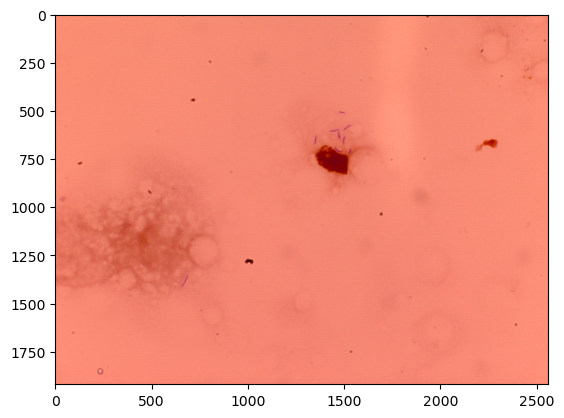

In [52]:
import imutils
import cv2
import numpy
import matplotlib.pyplot as plt
path='../train/train3/Serial3_No9.tif'
image = cv2.imread(path)
plt.imshow(image)

In [29]:
cv2.imwrite("test.jpg",image)

True

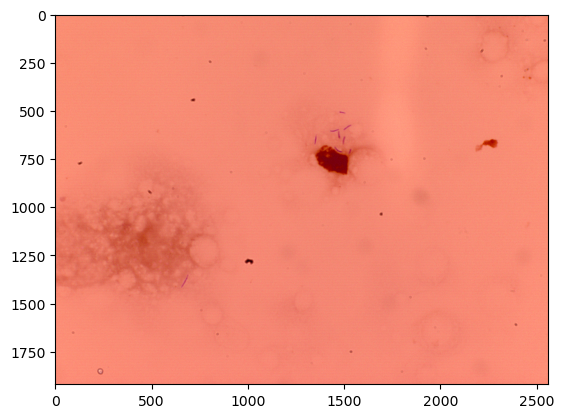

In [23]:
kernel = numpy.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
plt.imshow(image_sharp)

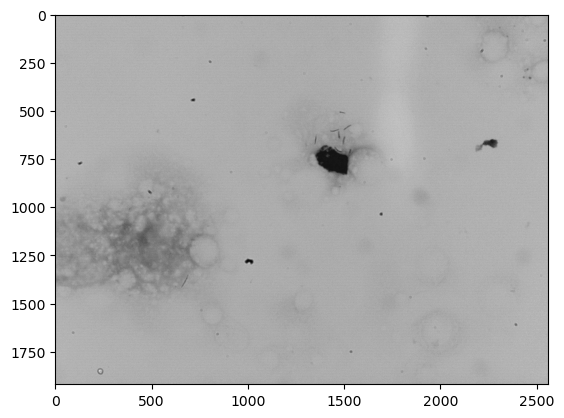

In [24]:
gray = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

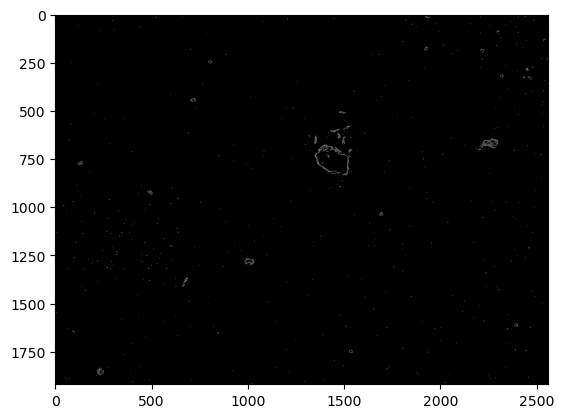

In [25]:
canny = cv2.Canny(gray,threshold1=100, threshold2=200)
plt.imshow(canny, cmap='gray')

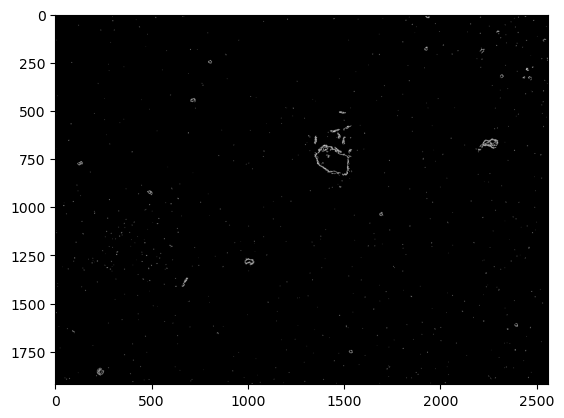

In [26]:
dilated = cv2.dilate(canny, (1,1), iterations = 1)
plt.imshow(dilated, cmap='gray')

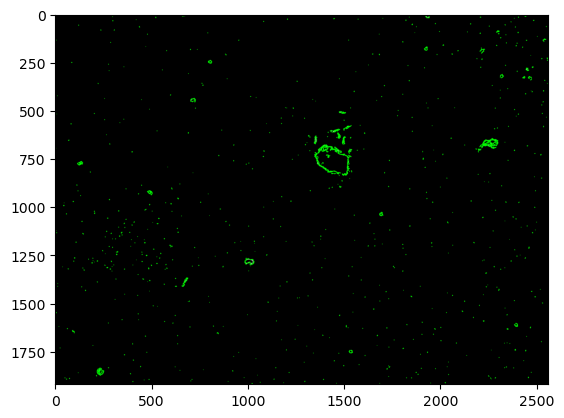

In [27]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)
plt.imshow(rgb)

In [28]:
print('Bacteria Objects Detected in the image: ', len(cnt))
plt.show()

Bacteria Objects Detected in the image:  720


# Counting of Pink Cells

In [59]:
""" GBR Vector for the color (76, 99 ,203)"""

' GBR Vector for the color (76, 99 ,203)'

In [71]:
from PIL import Image
path='../train/train3/Serial3_No1.tif'
im = Image.open(path)
#im.show()

In [72]:
imarray=numpy.array(im)

In [73]:
imarray_contours=imarray.copy()

In [74]:
counter={}
colors=['pink']
for color in colors:
    image_process=imarray_contours.copy()
    counter[color]=0
    if color=='pink':
        lower=numpy.array([232,49,44])
        upper=numpy.array([284,59,54])
    
    image_mask=cv2.inRange(image_process,lower,upper)
    image_res=cv2.bitwise_and(image_process,image_process,mask=image_mask)

    image_gray=cv2.cvtColor(image_process,cv2.COLOR_BGR2GRAY)
    image_gray=cv2.GaussianBlur(image_gray,(5,5),0)

    image_edge=cv2.Canny(image_gray,50,100)
    image_edge=cv2.dilate(image_edge,None,iterations=1)
    image_edge=cv2.erode(image_edge,None,iterations=1)

    cnts=cv2.findContours(image_edge.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    rgb=cv2.cvtColor(image_edge.copy(),cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb,cnt,-1,(0,255,0),2)

    cnts=cnts[0] if imutils.is_cv2() else cnts[1]

    print(len(cnt))

    for item in cnts:
        # if(cv2.contourArea(item)<5):
        #     continue
        # hull=cv2.convexHull(item)
        # if color=='pink':
        #     cv2.drawContours(imarray_contours,[hull],0,(0,255,0),1)

        counter[color]+=1

    print(counter)


720
{'pink': 1}
